### Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load data

In [13]:
census = pd.read_csv("../../data/census/census_tract.csv")

# Removing missing rows with missing population values
census = census.drop(census[census.TotalPop == 0].index)

print("Shape of data", census.shape)
print("Columns", census.columns)
census.head()

Shape of data (73311, 37)
Columns Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


### Longest and Shortest County names

In [14]:
longest_county_name_on_census_dataset_index = np.argmax(census.County.map(len))
s_i = np.argmin(census.County.map(len))

census[(census.index == longest_county_name_on_census_dataset_index) | (census.index == s_i)]

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
590,1081040200,Alabama,Lee,5210,2881,2329,3.3,73.2,12.2,0.0,...,14.9,4.8,4.3,18.2,2691,66.6,26.3,5.4,1.7,4.4
1330,2198000100,Alaska,Prince of Wales-Hyder Census Area,2139,1274,865,0.5,58.0,0.1,31.8,...,25.6,10.4,3.0,15.2,954,50.8,39.6,9.4,0.1,14.3


### Largest income error

The income given can be off by as much as 123,116

In [15]:
max_income_err = np.argmax(census.IncomeErr)
max_income_err = census[census.index == max_income_err]

print(max_income_err.IncomeErr)
max_income_err

63909    123116.0
Name: IncomeErr, dtype: float64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
63909,48201210100,Texas,Harris,5799,5299,500,33.5,16.3,48.6,0.0,...,0.0,0.0,9.3,33.0,118,66.9,28.8,4.2,0.0,0.0


### Largest Income per cap error

The per capita income can be off by as much as 134,380.  I wonder if this indicates high income inequality

In [16]:
max_per_cap_err = np.argmax(census.IncomePerCapErr)
max_per_cap_err = census[census.index == max_per_cap_err]

print(max_per_cap_err.IncomePerCapErr)
max_per_cap_err

27513    134380.0
Name: IncomePerCapErr, dtype: float64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
27513,21067003916,Kentucky,Fayette,598,282,316,0.0,98.2,1.5,0.0,...,0.0,1.6,9.5,28.1,315,70.5,15.9,13.7,0.0,6.8


# Selected Counties

### Overview

In [17]:
counties = ["Santa Clara", "San Diego", "Monterey", "Alameda", "San Francisco", "Contra Costa", "Los Angeles"]

commute, men, women, hispanic, white, black, native, asian, pacific = ([],[],[],[],[],[],[],[],[])

for county in counties:
    curr_county = census[census.County == county]

    commute.append(curr_county.MeanCommute.median())
    men.append(curr_county.Men.sum() / 1000)
    women.append(curr_county.Women.sum() / 1000)
    hispanic.append(((curr_county.Hispanic * curr_county.TotalPop) / 100000).sum())
    white.append(((curr_county.White * curr_county.TotalPop) / 100000).sum())
    black.append(((curr_county.Black * curr_county.TotalPop) / 100000).sum())
    native.append(((curr_county.Native * curr_county.TotalPop) / 100000).sum())
    asian.append(((curr_county.Asian * curr_county.TotalPop) / 100000).sum())
    pacific.append(((curr_county.Pacific * curr_county.TotalPop) / 100000).sum())

pd.DataFrame({
    "Women": women,
    "Men": men,
    "Median Commute": commute,
    "Hispanic": hispanic,
    "White": white,
    "Black": black,
    "Native": native,
    "Asian": asian,
    "Pacific": pacific
}, index=counties)

,Asian,Black,Hispanic,Median Commute,Men,Native,Pacific,White,Women
Santa Clara,626.084204,45.044374,497.096021,25.90,939.004,3.517091,6.229886,627.348056,929.145
San Diego,362.505592,153.028657,1060.986419,25.00,1618.945,11.704634,13.484862,1515.345646,1604.151
Monterey,25.217526,10.976058,243.887348,21.90,219.299,1.219249,1.953637,135.018274,209.142
Alameda,436.266111,179.375374,358.167652,30.15,776.699,4.821192,13.265241,522.723766,808.284
San Francisco,281.876728,44.899562,128.619425,31.70,427.909,1.504401,3.363267,346.739781,412.854
Contra Costa,165.354764,94.061627,273.359785,33.50,534.618,3.078708,5.201260,503.848967,561.450
Los Angeles,1401.446849,801.753272,4842.311257,29.80,4945.351,18.720465,24.665115,2703.669537,5093.037


### Gender imbalance

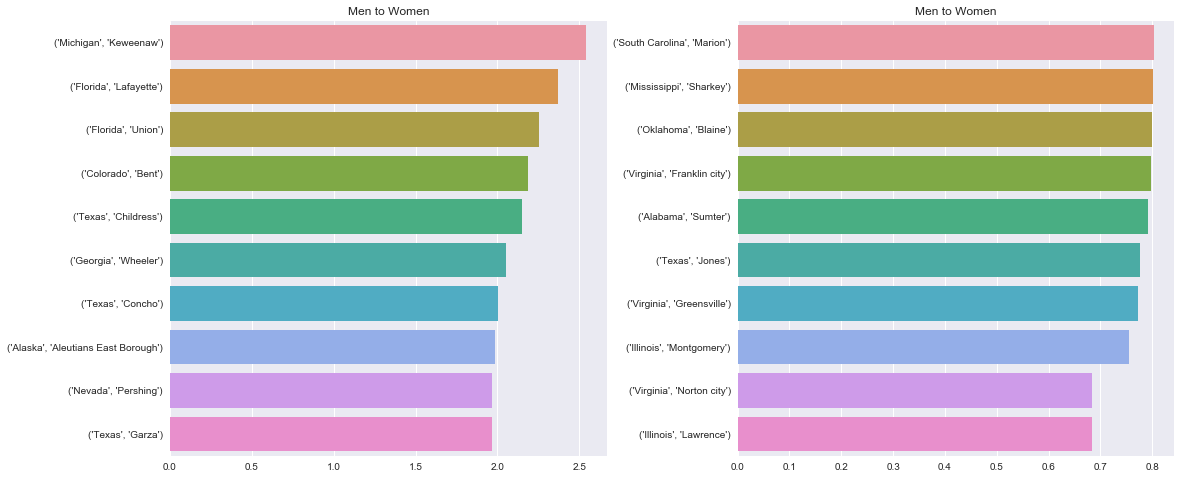

In [26]:
census["Males to females"] = census.Men / census.Women
ratio = census.groupby(["State", "County"])["Males to females"].median().sort_values(ascending=False)

fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(wspace=0.3)

data = ratio.head(10)
sns.barplot(x=data.values, y=data.index, ax=axarr[0]).set(title="Men to Women")

data = ratio.tail(10)
_ = sns.barplot(x=data.values, y=data.index, ax=axarr[1]).set(title="Men to Women")

### Commute Times

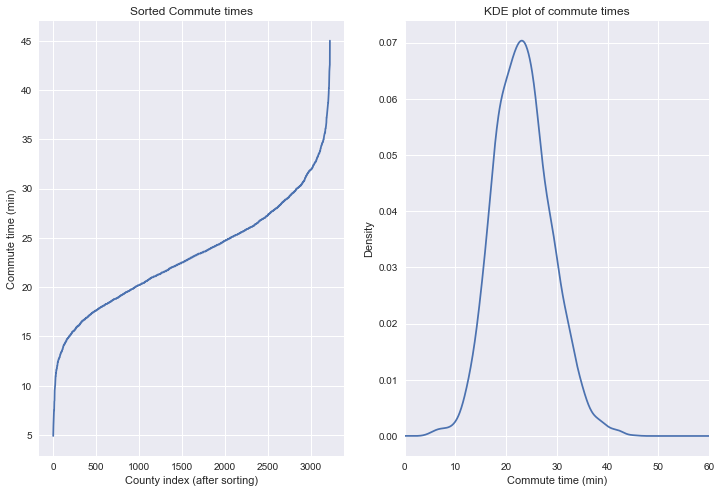

In [8]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

commute_times = census.groupby(["State", "County"])["MeanCommute"].median().sort_values().values
axarr[0].plot(commute_times)
axarr[0].set(title="Sorted Commute times", xlabel="County index (after sorting)", ylabel="Commute time (min)")

_ = (
        census
            .groupby(["State", "County"])["MeanCommute"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of commute times", xlabel="Commute time (min)", xlim=(0,60))
)